In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 228 GB / percent used: 9.3 %


# Check model data

In [7]:
path = '/ccc/store/cont003/thredds/p86caub/ICOLMDZOR/PROD/highresSST-present/CM7A-HR-v1.11.highresSST-present'
path_CM6 = '/bdd/CMIP6/HighResMIP/IPSL/IPSL-CM6A-ATM-HR/highresSST-present/r1i1p1f1'

folder = 'SRF'
var_LMDZ = 'frac_snow'

var = 'snc'
table = 'LImon'

In [3]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_LMDZ+'.nc')

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 360, lon: 720, time_counter: 780)
Coordinates:
  * lat                   (lat) float32 -90.0 -89.498604 ... 89.498604 90.0
  * lon                   (lon) float32 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    Areas                 (lat, lon) float32 ...
    Contfrac              (lat, lon) float32 ...
    frac_snow             (time_counter, lat, lon) float32 ...
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Jan-24 08:26:06 GMT
    uuid:         df84bd4e-118e-421f-9b7f-244e0c536f0f
    LongName:     IPSLCM6.1.11-LR

In [8]:
xr.open_dataset(path_CM6+'/'+table+'/'+var+'/gr/latest/'+var+'_'+table+'_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc')

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 361, lon: 512, time: 780)
Coordinates:
  * lat          (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon          (lon) float32 0.0 0.703125 1.40625 ... 358.59375 359.29688
  * time         (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    snc          (time, lat, lon) float32 ...
Attributes:
    name:                  /ccc/work/cont003/gencmip6/p86ghatt/IGCM_OUT/LMDZO...
    Conventions:           CF-1.7 CMIP-6.2
    creation_date:         2018-09-20T11:33:54Z
    tracking_id:           hdl:21.14100/8a82058d-42b7-4a38-9b29-4a4136fbd16c
    description:           Forced global atmosphere-land simulations using da...
    title:                 IPSL-CM6A-ATM-HR model output prepared for CMIP6 /...
    activity_id:           HighResMIP
    contact:               ipsl-cmip6@listes.ipsl.fr
    data_specs_version:    01.00.21
    dr2xml_version:        1.12
    experiment_id:         highresSST-present
    experiment:            forced atmosphere experiment for 1950-2014
    external_variables:    areacella
    forcing_index:         1
    frequency:             mon
    further_info_url:      https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM6...
    grid:                  LMDZ grid
    grid_label:            gr
    nominal_resolution:    50 km
    initialization_index:  1
    institution_id:        IPSL
    institution:           Institut Pierre Simon Laplace, Paris 75252, France
    license:               CMIP6 model data produced by IPSL is licensed unde...
    mip_era:               CMIP6
    physics_index:         1
    product:               model-output
    realization_index:     1
    realm:                 landIce land
    source:                IPSL-CM6A-ATM-HR (2018):  atmos: LMDZ (NPv6, N256;...
    source_id:             IPSL-CM6A-ATM-HR
    source_type:           AGCM
    sub_experiment_id:     none
    sub_experiment:        none
    table_id:              LImon
    variable_id:           snc
    variant_label:         r1i1p1f1
    EXPID:                 highresSST-present
    CMIP6_CV_version:      cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:         523ab9c7b70cfe3bc2c825d1e555e1d0
    model_version:         6.1.5
    branch_method:         no parent
    parent_activity_id:    no parent
    parent_experiment_id:  no parent
    parent_mip_era:        no parent
    parent_source_id:      no parent
    parent_time_units:     no parent
    history:               Wed Oct 24 15:13:26 2018: ncatted -O -a parent_var...
    NCO:                   "4.6.0"
    parent_variant_label:  no parent

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


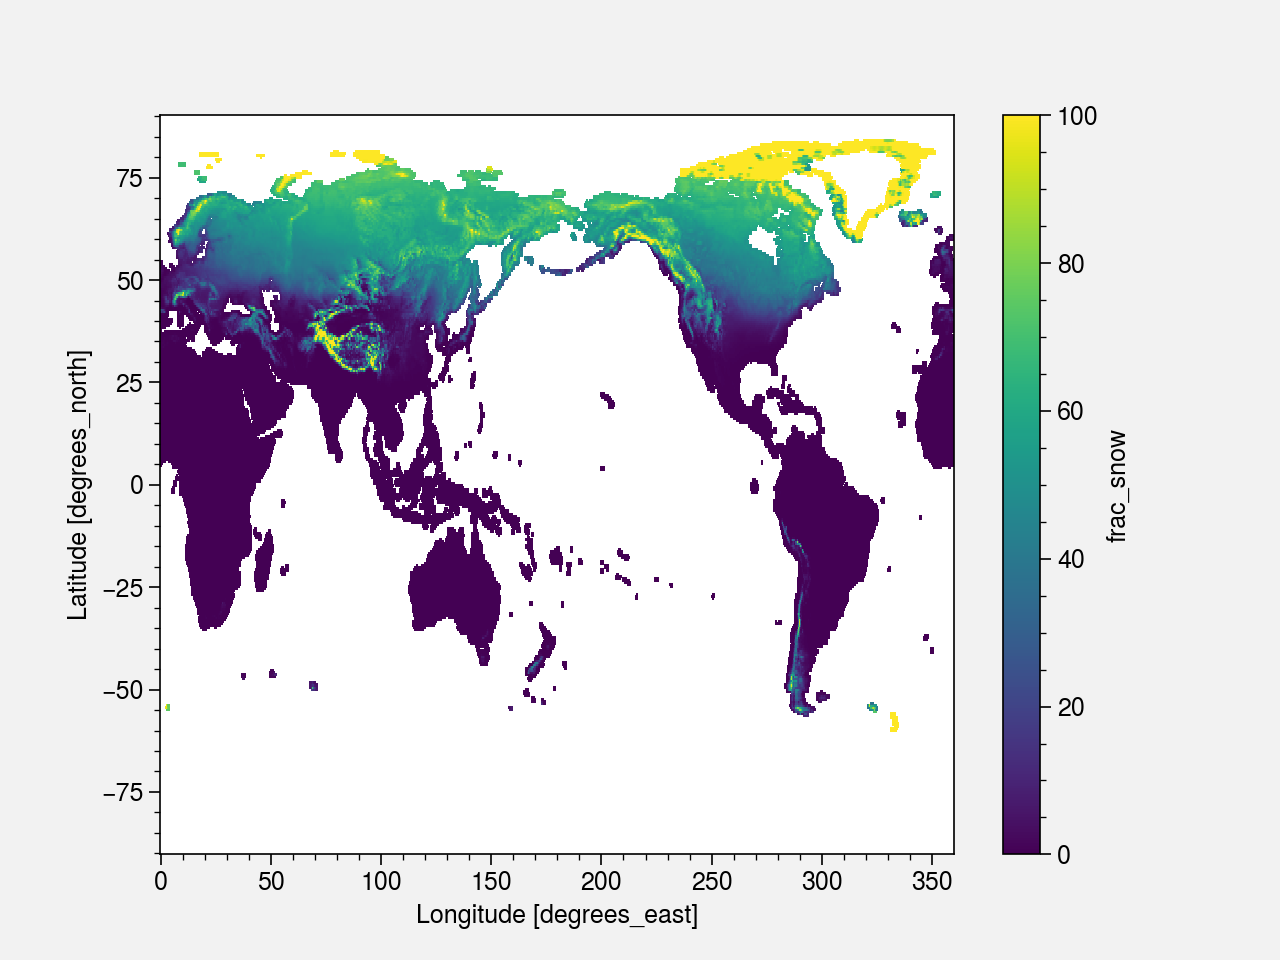

In [9]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').plot()

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


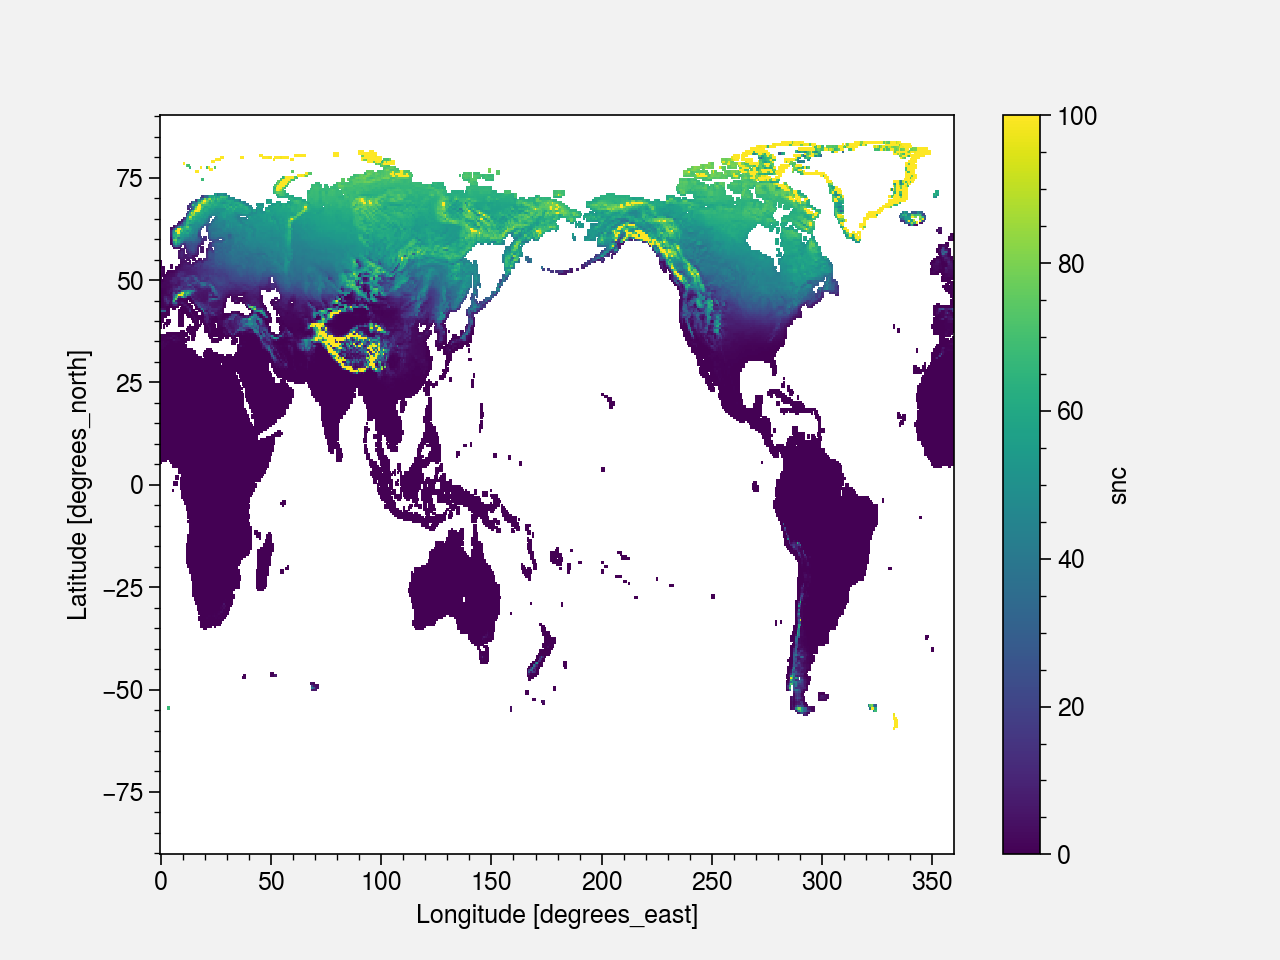

In [10]:
xr.open_dataset(path_CM6+'/'+table+'/'+var+'/gr/latest/'+var+'_'+table+'_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc')[var].mean('time').plot()

# Define period and zone

In [11]:
# Define common period
period = slice('1981','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'snc'
label = 'Snow cover extent'
units = '%'
cmap='viridis'
levels=plot.arange(0,100,10)

# Get model data dynamico and HR CM6

In [12]:
model_CM7 = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model_CM7 = model_CM7.rename({'time_counter': 'time'})
model_CM7

<xarray.DataArray 'frac_snow' (time: 408, lat: 360, lon: 720)>
[105753600 values with dtype=float32]
Coordinates:
  * lat            (lat) float32 -90.0 -89.498604 -88.997215 ... 89.498604 90.0
  * lon            (lon) float32 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
    time_centered  (time) datetime64[ns] ...
  * time           (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    long_name:           Snow fraction on total area including snow on vegeta...
    units:               %
    online_operation:    average
    interval_operation:  1 month
    interval_write:      1 month
    cell_methods:        time: mean

In [13]:
model_CM6 = xr.open_dataset(
    path_CM6+'/'+table+'/'+var+'/gr/latest/'+var+'_'+table+'_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc'
)[var].sel(time=period)
model_CM6

<xarray.DataArray 'snc' (time: 408, lat: 361, lon: 512)>
[75411456 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 0.0 0.703125 1.40625 ... 358.59375 359.29688
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

# Compute climatologies

In [14]:
calendar = model_CM7.time.encoding['calendar']
calendar

'gregorian'

In [15]:
model_CM6_clim = u.clim(model_CM6, calendar=calendar)
model_CM7_clim = u.clim(model_CM7, calendar=calendar)

# Load obs
## NOAA Climate Data Record (CDR) of Northern Hemisphere (NH) Snow Cover Extent (SCE), Version 1
https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00756

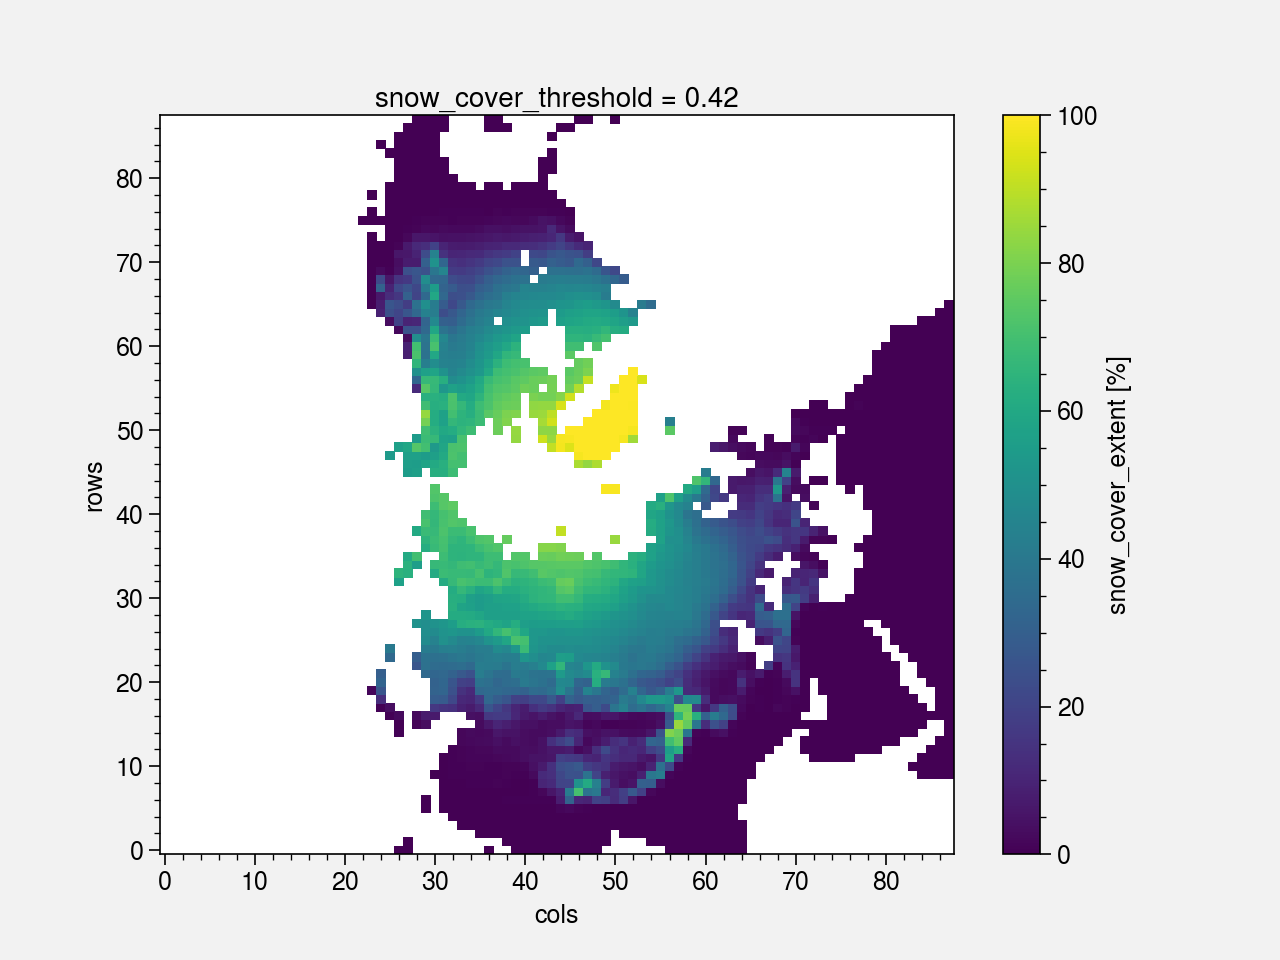

In [16]:
obs_longname = 'NOAA Climate Data Record (CDR) Version 1'
obs_name = 'NOAA CDR'

ds_rutger = xr.open_dataset('/data/mlalande/RUTGERS/nhsce_v01r01_19661004_20191202.nc').sel(time=period).mean('time')
with xr.set_options(keep_attrs=True): # Get the snc variable, keep only land data and convert to %
    obs_clim = ds_rutger.snow_cover_extent.where(ds_rutger.land == 1)*100   
obs_clim.attrs['units'] = '%'
obs_clim = obs_clim.rename({'longitude': 'lon', 'latitude': 'lat'}) # Rename lon and lat for the regrid
# obs = obs.resample(time='1MS').mean('time', skipna='False', keep_attrs=True) # Resamble data per month (from per week)
obs_clim.plot()

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 

Regrid towards HR-CM6 with lower resolution (but obs lower... needs better obs...)

In [19]:
# reuse_weights=False car les 2 ont le même nom...autrement il faut que je spécifie un nom particulier

# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

regridder_obs = xe.Regridder(obs_clim, model_CM6_clim, 'bilinear', periodic=True, reuse_weights=False)
regridder_obs = add_matrix_NaNs(regridder_obs)
obs_clim_regrid = regridder_obs(obs_clim)

regridder_CM7 = xe.Regridder(model_CM7_clim, model_CM6_clim, 'bilinear', periodic=True, reuse_weights=False)
regridder_CM7 = add_matrix_NaNs(regridder_CM7)
model_CM7_clim_regrid = regridder_CM7(model_CM7_clim)

Overwrite existing file: bilinear_88x88_361x512_peri.nc 
 You can set reuse_weights=True to save computing time.


/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Overwrite existing file: bilinear_360x720_361x512_peri.nc 
 You can set reuse_weights=True to save computing time.


# Plot differences

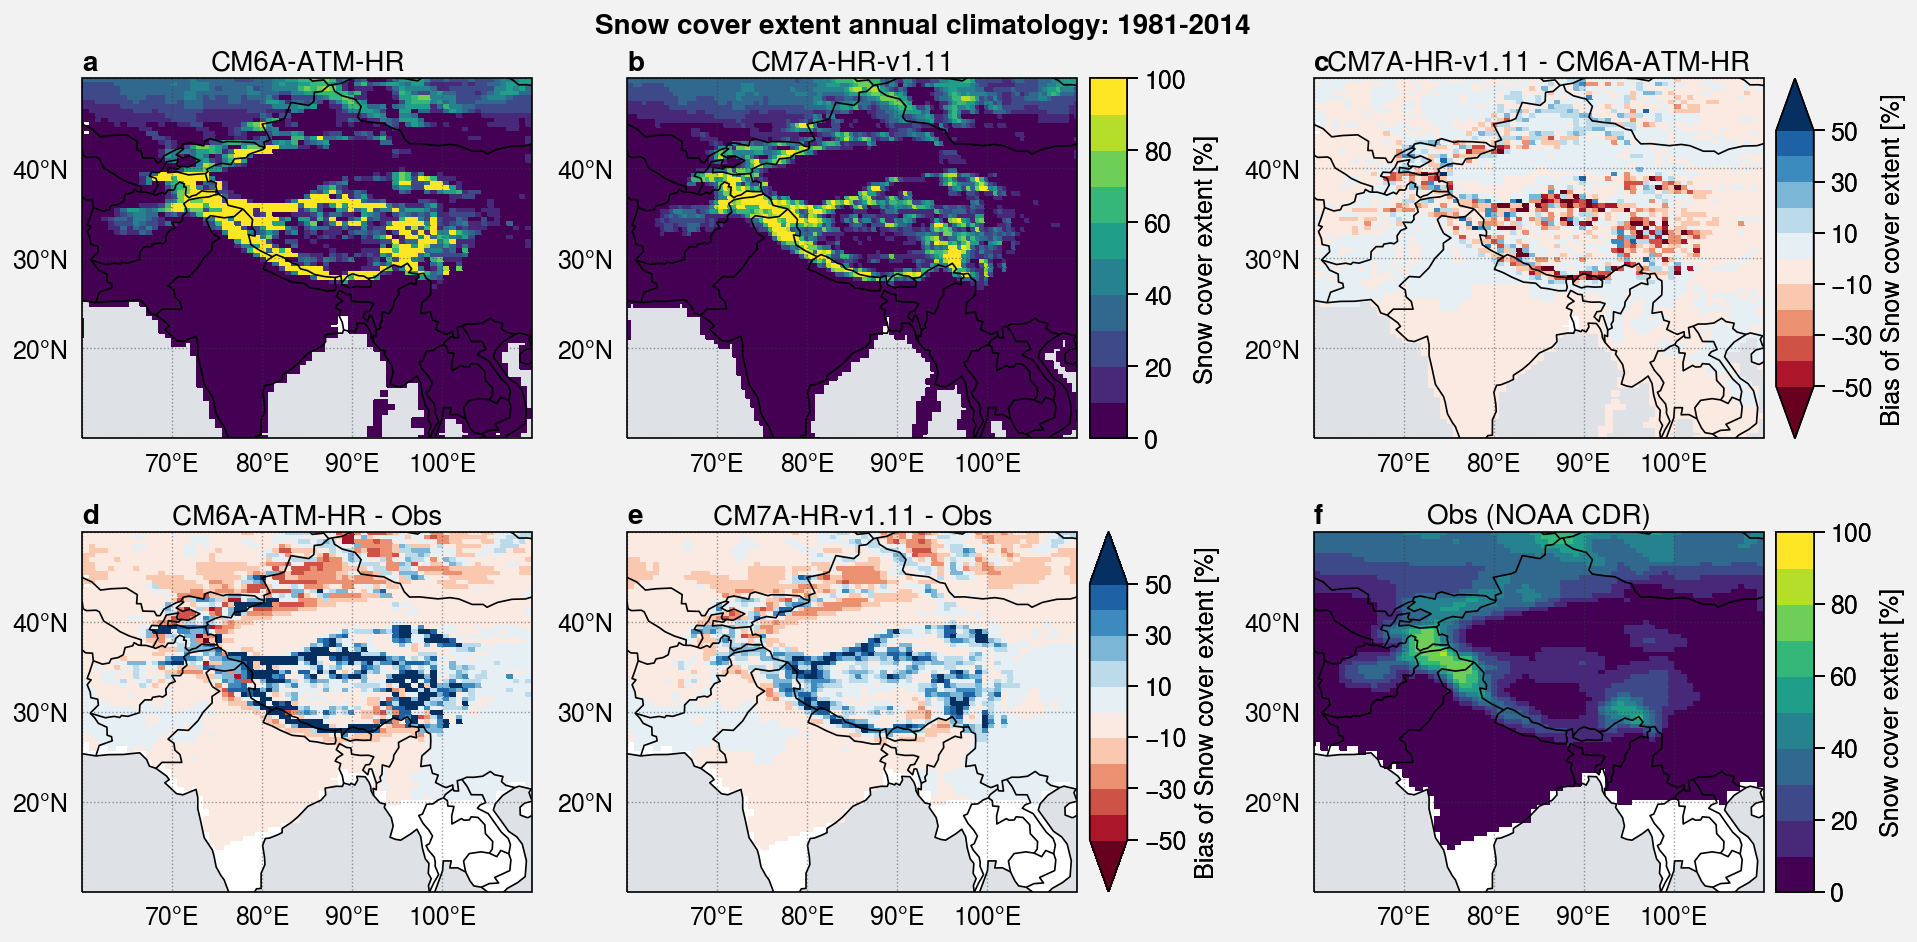

In [21]:
f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2)

levels_diff = plot.arange(-50,50,10)
cmap_diff = 'BuRd_r'
extend_diff = 'both'

# First row: differences CM7A-HR-v1.11 / not guide
axs[0].pcolormesh(model_CM6_clim, cmap=cmap, levels=levels)
axs[0].format(title='CM6A-ATM-HR')

m1 = axs[1].pcolormesh(model_CM7_clim, cmap=cmap, levels=levels)
axs[1].format(title='CM7A-HR-v1.11')
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh(model_CM7_clim_regrid - model_CM6_clim, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[2].format(title='CM7A-HR-v1.11 - CM6A-ATM-HR')
axs[2].colorbar(m2, label='Bias of '+label+ ' ['+units+']')


# Second row: differences with obs

axs[3].pcolormesh(model_CM6_clim - obs_clim_regrid, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[3].format(title='CM6A-ATM-HR - Obs')

axs[4].pcolormesh(model_CM7_clim_regrid - obs_clim_regrid, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[4].format(title='CM7A-HR-v1.11 - Obs')
axs[4].colorbar(m2, label='Bias of '+label+ ' ['+units+']')

axs[5].pcolormesh(obs_clim_regrid, cmap=cmap, levels=levels)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop,
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

# f.save('img/'+var+'_dynamico_'+period.start+'-'+period.stop+'.png')
# f.save('img/'+var+'_dynamico_'+period.start+'-'+period.stop+'.pdf')